In [1]:
from jedi.debug import SPEED
# !pip install fastf1 torch matplotlib
!pip install pandas numpy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [220]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import fastf1
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [15]:
#get the schedule for the f1 races for the following year
schedule = fastf1.get_event_schedule(2024)
WIN_DRIVER = "VER" #verstappend

req         WARNING 	DEFAULT CACHE ENABLED! (6.91 GB) C:\Users\Rishit\AppData\Local\Temp\fastf1


In [16]:
schedule.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2024,2024-02-23,Pre-Season Testing,testing,Practice 1,2024-02-21 10:00:00+03:00,2024-02-21 07:00:00,...,Practice 3,2024-02-23 10:00:00+03:00,2024-02-23 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,2024-03-02,Bahrain Grand Prix,conventional,Practice 1,2024-02-29 14:30:00+03:00,2024-02-29 11:30:00,...,Practice 3,2024-03-01 15:30:00+03:00,2024-03-01 12:30:00,Qualifying,2024-03-01 19:00:00+03:00,2024-03-01 16:00:00,Race,2024-03-02 18:00:00+03:00,2024-03-02 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,2024-03-09,Saudi Arabian Grand Prix,conventional,Practice 1,2024-03-07 16:30:00+03:00,2024-03-07 13:30:00,...,Practice 3,2024-03-08 16:30:00+03:00,2024-03-08 13:30:00,Qualifying,2024-03-08 20:00:00+03:00,2024-03-08 17:00:00,Race,2024-03-09 20:00:00+03:00,2024-03-09 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024,2024-03-24,Australian Grand Prix,conventional,Practice 1,2024-03-22 12:30:00+11:00,2024-03-22 01:30:00,...,Practice 3,2024-03-23 12:30:00+11:00,2024-03-23 01:30:00,Qualifying,2024-03-23 16:00:00+11:00,2024-03-23 05:00:00,Race,2024-03-24 15:00:00+11:00,2024-03-24 04:00:00,True
4,4,Japan,Suzuka,FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024,2024-04-07,Japanese Grand Prix,conventional,Practice 1,2024-04-05 11:30:00+09:00,2024-04-05 02:30:00,...,Practice 3,2024-04-06 11:30:00+09:00,2024-04-06 02:30:00,Qualifying,2024-04-06 15:00:00+09:00,2024-04-06 06:00:00,Race,2024-04-07 14:00:00+09:00,2024-04-07 05:00:00,True


In [17]:
def get_race_session_data(schedule,year):
    session_data = {
        "year" : [],
        "country" : [],
        "event_type":[],
        "event_name":[],
        "time":[]
    }
    for index,session_name in enumerate(schedule['OfficialEventName']):
        row = schedule.iloc[index]
        names = ["FP1","FP2","FP3",'Q',"R"]
        if row['F1ApiSupport']:
            name_of_event = row['OfficialEventName']
            location = row['Country']
            time_fp1 = row['Session1DateUtc']
            time_fp2 = row['Session2DateUtc']
            time_fp3 = row['Session3DateUtc']
            time_q = row['Session4DateUtc']
            time_r = row['Session5DateUtc']
            session_data['country'].append(location)
            session_data['event_type'].append(names)
            session_data["time"].append([time_fp1,time_fp2,time_fp3,time_q,time_r])
            session_data['event_name'].append(name_of_event)
            session_data['year'].append(year)
    return session_data

In [18]:
session_details = get_race_session_data(schedule,2021)
WIN_DRIVER = "VER"

In [19]:
pd.DataFrame(session_details)

,year,country,event_type,event_name,time
0,2021,Bahrain,"[FP1, FP2, FP3, Q, R]",FORMULA 1 ARAMCO PRE-SEASON TESTING 2024,"[2024-02-21 07:00:00, 2024-02-22 07:00:00, 202..."
1,2021,Bahrain,"[FP1, FP2, FP3, Q, R]",FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,"[2024-02-29 11:30:00, 2024-02-29 15:00:00, 202..."
2,2021,Saudi Arabia,"[FP1, FP2, FP3, Q, R]",FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,"[2024-03-07 13:30:00, 2024-03-07 17:10:00, 202..."
3,2021,Australia,"[FP1, FP2, FP3, Q, R]",FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024,"[2024-03-22 01:30:00, 2024-03-22 05:00:00, 202..."
4,2021,Japan,"[FP1, FP2, FP3, Q, R]",FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024,"[2024-04-05 02:30:00, 2024-04-05 06:00:00, 202..."
5,2021,China,"[FP1, FP2, FP3, Q, R]",FORMULA 1 LENOVO CHINESE GRAND PRIX 2024,"[2024-04-19 03:30:00, 2024-04-19 07:30:00, 202..."
6,2021,United States,"[FP1, FP2, FP3, Q, R]",FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2024,"[2024-05-03 16:30:00, 2024-05-03 20:30:00, 202..."
7,2021,Italy,"[FP1, FP2, FP3, Q, R]",FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ...,"[2024-05-17 11:30:00, 2024-05-17 15:00:00, 202..."
8,2021,Monaco,"[FP1, FP2, FP3, Q, R]",FORMULA 1 GRAND PRIX DE MONACO 2024,"[2024-05-24 11:30:00, 2024-05-24 15:00:00, 202..."
9,2021,Canada,"[FP1, FP2, FP3, Q, R]",FORMULA 1 AWS GRAND PRIX DU CANADA 2024,"[2024-06-07 17:30:00, 2024-06-07 21:00:00, 202..."


In [20]:
def get_race_session(session_details):
    # because we only want winning strategies we would only be taking data for drivers who won the season
    # thus for session we have hard coded driver name based on research

    for index,country in enumerate(session_details['country']):
        year = session_details['year'][index]
        event_type = session_details['event_type'][index]
        event_name = session_details['event_name'][index]
        time = session_details['time'][index]
        for i in range(len(event_type)):
            try:
                session = fastf1.get_session(year,country,event_type[i])
                session.load()
            except:
                print("no session")
            # save the data for the relative lap event type in the format {year}_{track_name}_{event_type}.csv
            try:
                lap_data = pd.DataFrame(session.laps.pick_driver(WIN_DRIVER))
                if not os.path.exists(f"data/laps"):
                    os.makedirs(f"data/laps")
                lap_data.to_csv(f"data/laps/{year}_{event_name}_{event_type[i]}.csv",index=False)
            except:
                print("no laps data")
            # do the same for the weather data
            try:
                weather_data = pd.DataFrame(session.weather_data.pick_driver(WIN_DRIVER))
                if not os.path.exists("data/weather"):
                    os.makedirs("data/weather")
                weather_data.to_csv(f"models/weather/{year}_{event_name}_{event_type[i]}.csv",index=False)
            except:
                print("no weather data")
            # results
            try:
                if not os.path.exists("data/result"):
                    os.makedirs("data/result")
                result = pd.DataFrame(session.results)
                result.to_csv(f"data/result/{year}_{event_name}_{event_type[i]}.csv",index=False)
            except:
                print("no results")





In [21]:
get_race_session(session_details)

core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarni

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '16', '10', '3', '4', '55', '14', '18', '11', '99', '22', '7', '63', '31', '6', '5', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Us

no weather data


core        WARNING 	Fixed incorrect tyre stint information for driver '11'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.067000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info


no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '16', '10', '3', '4', '55', '14', '18', '11', '99', '22', '7', '63', '31', '6', '5', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Us

no weather data


core        WARNING 	Fixed incorrect tyre stint information for driver '11'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.067000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '16', '11', '10', '4', '22', '31', '99', '3', '7', '14', '63', '55', '6', '5', '18', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            IN

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.180000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '31', '3', '10', '16', '55', '99', '4', '18', '6', '14', '22', '7', '5', '11', '9', '63', '47']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Australia' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '16', '18', '22', '31', '33', '37', '44', '45', '47', '55', '77', '98']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Australia' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_s

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Australia' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_s

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Australia' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_s

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '5', '63', '18', '55', '16', '3', '14', '99', '7', '31', '6', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Australia' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.061000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '4', '44', '55', '11', '3', '16', '10', '14', '63', '22', '18', '99', '7', '6', '5', '47', '9', '31']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprec

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '45', '47', '55', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Japan' to 'Spanish Grand Prix'
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Japan' to 'Spanish Grand Prix'
core           INFO 	Loading data for Spanish Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correct

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', '6', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Japan' to 'Spanish Grand Prix'
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
r

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.083000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '11', '3', '55', '4', '31', '10', '18', '7', '5', '63', '99', '6', '14', '47', '9', '22']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'China' to 'Russian Grand Prix'
core           INFO 	Loading data for Russian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
r

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'China' to 'Russian Grand Prix'
core           INFO 	Loading data for Russian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'China' to 'Russian Grand Prix'
core           INFO 	Loading data for Russian Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

no weather data


req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
events      WARNING 	Correcting user input 'China' to 'Russian Grand Prix'
core           INFO 	Loading data for Russian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


no laps data
no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '55', '63', '44', '3', '14', '77', '18', '11', '31', '5', '10', '22', '6', '16', '7', '47', '99', '9', '33']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'China' to 'Russian Grand Prix'
core           INFO 	Loading data for Russian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
r

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.044000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '55', '3', '77', '14', '4', '7', '11', '63', '18', '5', '10', '31', '16', '99', '22', '9', '6', '47']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '77', '16', '55', '3', '4', '10', '22', '31', '5', '99', '14', '63', '18', '6', '7', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '16', '3', '77', '55', '4', '22', '5', '99', '18', '7', '63', '6', '47', '9', '14', '31', '10']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprec

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Italy' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Italy' to 'Italian Grand Prix'
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprec

no weather data
no session
no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '3', '10', '55', '16', '11', '99', '5', '18', '14', '31', '63', '6', '22', '47', '88', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Italy' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data


no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 3 completed the race distance 00:00.086000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '77', '16', '11', '55', '18', '14', '63', '31', '6', '5', '99', '88', '47', '9', '44', '33', '10', '22']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	U

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Monaco Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req       

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Monaco Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req       

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req       

no weather data


core        WARNING 	No lap data for driver 47
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 47)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '33', '77', '55', '4', '10', '44', '5', '11', '99', '31', '3', '18', '7', '63', '22', '14', '6', '9', '47']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for dri

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.058000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '55', '4', '11', '5', '10', '44', '18', '31', '99', '7', '3', '14', '63', '6', '22', '9', '47', '77', '16']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Canada' to 'Abu Dhabi Grand Prix'
core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_i

no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '77', '89', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correct

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Canada' to 'Abu Dhabi Grand Prix'
core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_st

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Canada' to 'Abu Dhabi Grand Prix'
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '4', '11', '55', '77', '16', '22', '31', '3', '14', '10', '18', '99', '5', '6', '63', '7', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correct

no weather data


core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.035000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Spanish Grand Prix - Pract

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '45', '47', '55', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req     

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Spanish Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', '6', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.083000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '11', '3', '55', '4', '31', '10', '18', '7', '5', '63', '99', '6', '14', '47', '9', '22']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Austria' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_in

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '16', '18', '22', '31', '33', '37', '44', '45', '47', '55', '77', '98']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Austria' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Austria' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Austria' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '5', '63', '18', '55', '16', '3', '14', '99', '7', '31', '6', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Austria' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_da

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.061000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '4', '44', '55', '11', '3', '16', '10', '14', '63', '22', '18', '99', '7', '6', '5', '47', '9', '31']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Kingdom' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached da

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Kingdom' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached dat

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Kingdom' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached dat

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Kingdom' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '77', '16', '55', '3', '4', '10', '22', '31', '5', '99', '14', '63', '18', '6', '7', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correct

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '16', '3', '77', '55', '4', '22', '5', '99', '18', '7', '63', '6', '47', '9', '14', '31', '10']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Hungarian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO

no weather data


core        WARNING 	Fixed incorrect tyre stint information for driver '88'
core        WARNING 	Driver 88: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cac

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Hungarian Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req    

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req    

no weather data


core        WARNING 	No lap data for driver 47
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 47)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '11', '10', '4', '16', '31', '14', '5', '3', '18', '7', '99', '55', '22', '63', '6', '9', '47']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for 

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 31 completed the race distance 00:00.068000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['31', '44', '55', '14', '10', '22', '6', '63', '33', '7', '3', '47', '99', '9', '4', '77', '11', '16', '18', '5']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Belgian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Belgian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Belgian Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '63', '44', '3', '5', '10', '11', '77', '31', '4', '16', '6', '55', '14', '18', '99', '22', '47', '7', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Us

no weather data


core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '99'
core        WARNING 	Fixed incorrect tyre stint information for driver '47'
core        WARNING 	Fixed incorrect tyre stint information for driver '9'
core        WARNING 	Fixed incorrect tyre stint information for driver '7'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '63', '44', '3', '5', '10', '31', '16', '6', '55', '14', '77', '99', '4', '22', '47', '9', '7', '11', '18']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.

no weather data


core        WARNING 	Fixed incorrect tyre stint information for driver '16'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Dutch Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_d

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Dutch Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req        

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req       

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '10', '16', '55', '99', '31', '14', '3', '63', '18', '4', '6', '22', '11', '5', '88', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Usi

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.012000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '10', '16', '14', '55', '11', '31', '4', '3', '18', '5', '99', '88', '6', '63', '47', '22', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Italy' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info


no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


no weather data


events      WARNING 	Correcting user input 'Italy' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1

no weather data
no session
no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '3', '10', '55', '16', '11', '99', '5', '18', '14', '31', '63', '6', '22', '47', '88', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Italy' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data


no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 3 completed the race distance 00:00.086000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '77', '16', '11', '55', '18', '14', '63', '31', '6', '5', '99', '88', '47', '9', '44', '33', '10', '22']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Azerbaijan Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Azerbaijan Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req   

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '33', '10', '55', '4', '11', '22', '14', '77', '5', '31', '3', '7', '63', '6', '47', '9', '18', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading

no weather data


core        WARNING 	Fixed incorrect tyre stint information for driver '47'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 11 completed the race distance 00:00.028000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['11', '5', '10', '16', '4', '14', '22', '55', '3', '7', '99', '77', '47', '9', '44', '6', '63', '33', '18', '31']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Singapore' to 'Hungarian Grand Prix'
core           INFO 	Loading data for Hungarian Grand 

no weather data


core        WARNING 	Fixed incorrect tyre stint information for driver '88'
core        WARNING 	Driver 88: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '88', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Singapore' to 'Hungarian Grand Prix'
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.6.1]
req  

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Singapore' to 'Hungarian Grand Prix'
core           INFO 	Loading data for Hungarian Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Singapore' to 'Hungarian Grand Prix'
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session

no weather data


core        WARNING 	No lap data for driver 47
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 47)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '11', '10', '4', '16', '31', '14', '5', '3', '18', '7', '99', '55', '22', '63', '6', '9', '47']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Singapore' to 'Hungarian Grand Prix'
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.1]
req            INF

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 31 completed the race distance 00:00.068000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['31', '44', '55', '14', '10', '22', '6', '63', '33', '7', '3', '47', '99', '9', '4', '77', '11', '16', '18', '5']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '77', '16', '55', '3', '4', '10', '22', '31', '5', '99', '14', '63', '18', '6', '7', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            IN

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '16', '3', '77', '55', '4', '22', '5', '99', '18', '7', '63', '6', '47', '9', '14', '31', '10']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Mexico City Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Mexico City Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req  

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req  

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '11', '10', '55', '3', '16', '22', '4', '5', '7', '63', '99', '31', '14', '6', '47', '9', '18']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.032000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '10', '16', '55', '5', '7', '14', '4', '99', '3', '31', '18', '77', '63', '6', '9', '47', '22']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for São Paulo Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for São Paulo Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req    

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for São Paulo Gr

no weather data
no session
no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '11', '10', '55', '16', '4', '3', '14', '31', '5', '22', '7', '99', '18', '6', '63', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '11', '16', '55', '10', '31', '14', '4', '5', '7', '63', '99', '22', '6', '9', '47', '3', '18']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '77', '16', '55', '3', '4', '10', '22', '31', '5', '99', '14', '63', '18', '6', '7', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for United States Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            IN

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '16', '3', '77', '55', '4', '22', '5', '99', '18', '7', '63', '6', '47', '9', '14', '31', '10']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Qatar Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading

no weather data


core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Qatar Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for 

no weather data


core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for 

no weather data


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '10', '14', '4', '55', '22', '31', '5', '11', '18', '16', '3', '63', '7', '6', '99', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '14', '11', '31', '18', '55', '16', '4', '5', '10', '3', '22', '7', '99', '47', '63', '9', '6', '77']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Arab Emirates' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cac

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Arab Emirates' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cach

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Arab Emirates' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cach

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Arab Emirates' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cach

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '77', '16', '55', '3', '4', '10', '22', '31', '5', '99', '14', '63', '18', '6', '7', '47', '9']
C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United Arab Emirates' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached dat

no weather data


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '16', '3', '77', '55', '4', '22', '5', '99', '18', '7', '63', '6', '47', '9', '14', '31', '10']


no weather data


C:\Users\Rishit\Desktop\projects\f1-pitstop-prediction\.venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


#Cleaning and Preparing Data For Training
###Things to do:
- create a column called **improve** for each laptime
    - if the laptime is greater than the previous laptime then improve = 1 else 0
- convert the tyre type to numeric
- create a **did_pit** column
    - which is dependent upon the lap number and also is determined if the value of pit in time is not NAN then the driver pit
    - will have the value 1 if the driver pits else 0
- join all the sessions datasets together to form one concurrent dataset (as many column data would be missing)
- create a column called **lap_number** which is the lap number of the driver in the race
- convert pitstop time to timestamp

In [ ]:
['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate']





In [121]:
def convert_timestring_to_timestamp(time_str):
    if pd.isna(time_str):
        return "00:00:00.000"
    td = pd.to_timedelta(time_str)

    # Format as hh:mm:ss.ms
    formatted = str(td).split()[-1]  # takes only the "HH:MM:SS.microseconds" partA
    if "." not in formatted:
        formatted += ".000"
    return formatted


In [166]:
"""
well turns out the position columns has a lot o NAN thus we dont include it in the feature columns
# check if position column has no NAN values then we add it to feature_cols
if not pd.isna(data['Position']).any():
    if "Position" not in feature_cols:
        feature_cols.append('Position')
else:
    if "Position" in feature_cols:
        feature_cols.remove('Position')



"""

'\nwell turns out the position columns has a lot o NAN thus we dont include it in the feature columns\n# check if position column has no NAN values then we add it to feature_cols\nif not pd.isna(data[\'Position\']).any():\n    if "Position" not in feature_cols:\n        feature_cols.append(\'Position\')\nelse:\n    if "Position" in feature_cols:\n        feature_cols.remove(\'Position\')\n\n\n\n'

In [162]:
def create_improve_column(data):
    import warnings
    warnings.filterwarnings("ignore")
    time_columns = ['LapTime','Sector1Time','Sector2Time','Sector3Time']
    for column in time_columns:
        column_vals = []
        data[column] = pd.to_datetime(data[column].apply(convert_timestring_to_timestamp),format='%H:%M:%S.%f') #convert the datainto timeframe
        for i in range(0,len(data)-1):
            if data[column].iloc[i] > data[column].iloc[i+1]:
                column_vals.append(1)
            else:
                column_vals.append(0)
        column_vals.append(0) # for the last row as we dont have any record after that we assume it didnt improve

        data[f'improve_{column}'] = column_vals

    # cleaning data columns now
    data = data.drop(columns=['LapTime','Sector1Time','Sector2Time','Sector3Time'])
    return data

def create_pit_column(data):
    pit_column = []
    for index,row in data.iterrows():
        if pd.isna(row['PitInTime']):
            pit_column.append(0)
        else:
            pit_column.append(1)
    data['did_pit'] = pit_column
    return data



def scale(column: pd.Series, ddof: int = 0):
    col = pd.to_numeric(column, errors="coerce")
    mean = col.mean()
    std = col.std(ddof=ddof)
    if pd.isna(std) or std == 0:
        return pd.Series(np.zeros(len(col)), index=column.index)
    return (col - mean) / std
def create_lap_data():
    corrupt_file = 0
    feature_cols = ['LapNumber', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest','Compound', 'TyreLife', 'FreshTyre','improve_LapTime','improve_Sector1Time','improve_Sector2Time','improve_Sector3Time','did_pit']
    main_df = pd.DataFrame(columns=feature_cols)
    for filename in os.listdir("data/laps"):
        try:
            data = pd.read_csv(f"data/laps/{filename}")

            # filtering excess data
            indices = np.where(data['Driver'] == WIN_DRIVER)
            data = data.iloc[indices]

            data = create_improve_column(data)
            data = create_pit_column(data)

            enc = OneHotEncoder()
            for col in ['FreshTyre',"IsPersonalBest","Compound"]:
                data[col]=enc.fit_transform(data[col].to_numpy().reshape(-1,1)).toarray()
            for col in ['SpeedI1','SpeedI2','SpeedFL','SpeedST']:
                data[col] = scale(data[col])
            data = data[feature_cols]
            main_df = pd.concat([main_df.reset_index(drop=True), data.reset_index(drop=True)], ignore_index=True)
            # data.to_csv("data/processed/"+str(filename),index=False)
        except Exception as e:
            # corrupt_file += 1
            # print(f"corrupt file {filename}")
            # print(f"corrupt files {corrupt_file}/{len(os.listdir('data/laps'))}")

            print(e)

    main_df.to_csv("data/processed/lap_data.csv",index=False)
    print("Finished creating lap data")
    return main_df


In [163]:
main_df = create_lap_data()

Finished creating lap data


In [196]:
df=pd.DataFrame(main_df)
print(df.shape)

(4828, 14)


In [199]:
for col in ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']:
    df[col].fillna(df[col].mean(),inplace=True)
print(df.isna().sum())

LapNumber              0
SpeedI1                0
SpeedI2                0
SpeedFL                0
SpeedST                0
IsPersonalBest         0
Compound               0
TyreLife               0
FreshTyre              0
improve_LapTime        0
improve_Sector1Time    0
improve_Sector2Time    0
improve_Sector3Time    0
did_pit                0
dtype: int64


In [200]:

df.shape

(4828, 14)

In [201]:
df.columns

Index(['LapNumber', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
       'improve_LapTime', 'improve_Sector1Time', 'improve_Sector2Time',
       'improve_Sector3Time', 'did_pit'],
      dtype='object')

In [202]:
df.head()

,LapNumber,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,improve_LapTime,improve_Sector1Time,improve_Sector2Time,improve_Sector3Time,did_pit
0,1.0,0.257829,-0.237398,-0.769686,-2.101783,1.0,1.0,1.0,0.0,0,0,1,1,0
1,2.0,0.784575,0.884950,1.693310,0.780401,0.0,1.0,2.0,0.0,0,0,0,0,0
2,3.0,-1.252178,-0.830337,-0.277087,-0.087727,1.0,1.0,3.0,0.0,1,1,1,1,0
3,4.0,0.802133,1.054361,0.215512,0.815126,0.0,1.0,4.0,0.0,0,0,0,0,0
4,5.0,-0.971246,0.249658,0.215512,-0.990580,1.0,1.0,5.0,0.0,1,1,1,1,0


In [203]:
main_df['did_pit'].value_counts()

did_pit
0    4176
1     652
Name: count, dtype: int64

In [211]:
# the number of did_pit =0 values are very large thus the model might become biased thus we create a balanced df

n_pos = df[df['did_pit'] == 1].shape[0]
balanced_neg = df[df['did_pit'] == 0].sample(n=n_pos, random_state=42)

# If you want the combined balanced dataset (all positives + sampled negatives):
balanced_df = pd.concat([df[df['did_pit'] == 1], balanced_neg], ignore_index=True)

In [228]:
for col in ['improve_LapTime', 'improve_Sector1Time', 'improve_Sector2Time','improve_Sector3Time','did_pit']:
    balanced_df[col] = balanced_df[col].astype(float)
balanced_df.dtypes

LapNumber              float64
SpeedI1                float64
SpeedI2                float64
SpeedFL                float64
SpeedST                float64
IsPersonalBest         float64
Compound               float64
TyreLife               float64
FreshTyre              float64
improve_LapTime        float64
improve_Sector1Time    float64
improve_Sector2Time    float64
improve_Sector3Time    float64
did_pit                float64
dtype: object

## TRAINING
- we start by splitting the dataset
- then create a function to plot predictions and dataset (yes, we plot)

In [247]:
from sklearn.model_selection import train_test_split
X = balanced_df[['LapNumber', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST','IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre','improve_LapTime', 'improve_Sector1Time', 'improve_Sector2Time','improve_Sector3Time']]
Y = balanced_df["did_pit"]

In [263]:
x_train,x_test,y_train,y_test  = train_test_split(X,Y,train_size=.9,random_state=42)

In [264]:
import matplotlib.pyplot as plt

In [265]:
def plot_pit_vs_speedst(df, speed_col="SpeedST", pit_col="did_pit"):
    x_pit = [0] * df[df[pit_col] == 1].shape[0]
    y_pit = df.loc[df[pit_col] == 1, speed_col]

    x_nopit = [2] * df[df[pit_col] == 0].shape[0]
    y_nopit = df.loc[df[pit_col] == 0, speed_col]

    plt.figure(figsize=(6, 5))
    plt.scatter(x_pit, y_pit, alpha=0.7, label="did_pit = 1")
    plt.scatter(x_nopit, y_nopit, alpha=0.7, label="did_pit = 0")
    plt.xticks([0, 2], ["Pit", "No Pit"])
    plt.ylabel(speed_col)
    plt.xlim(-1, 3)
    plt.grid(True, axis="y", linestyle="--", alpha=0.3)
    plt.legend()
    plt.show()

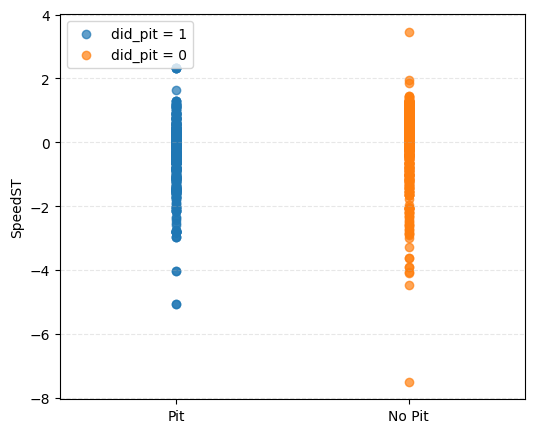

In [266]:
plot_pit_vs_speedst(balanced_df)

In [288]:
class logisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(len(X.columns),1)
    def forward(self,x):
        return torch.sigmoid(self.linear(x))



In [289]:
lrModel = logisticRegressionModel()
loss = nn.BCELoss()
optimizer = torch.optim.Adam(lrModel.parameters(), lr=0.001)
NUM_EPOCHS=10000
x_train_tensor = torch.from_numpy(x_train.to_numpy()).float()
y_train_tensor = torch.tensor(y_train.values,dtype=torch.float32).unsqueeze(1)


In [290]:
for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad() # reset the optimizer gradient i.e amount weights should be adjusted according to the loss
    y_pred = lrModel(x_train_tensor)
    loss_val = loss(y_pred,y_train_tensor)
    loss_val.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} Loss: {loss_val.item():.4f}")

Epoch 1/10000 Loss: 2.5811
Epoch 11/10000 Loss: 2.3389
Epoch 21/10000 Loss: 2.1691
Epoch 31/10000 Loss: 2.0025
Epoch 41/10000 Loss: 1.8398
Epoch 51/10000 Loss: 1.6822
Epoch 61/10000 Loss: 1.5311
Epoch 71/10000 Loss: 1.3877
Epoch 81/10000 Loss: 1.2538
Epoch 91/10000 Loss: 1.1313
Epoch 101/10000 Loss: 1.0222
Epoch 111/10000 Loss: 0.9287
Epoch 121/10000 Loss: 0.8524
Epoch 131/10000 Loss: 0.7941
Epoch 141/10000 Loss: 0.7527
Epoch 151/10000 Loss: 0.7256
Epoch 161/10000 Loss: 0.7089
Epoch 171/10000 Loss: 0.6989
Epoch 181/10000 Loss: 0.6926
Epoch 191/10000 Loss: 0.6882
Epoch 201/10000 Loss: 0.6847
Epoch 211/10000 Loss: 0.6817
Epoch 221/10000 Loss: 0.6790
Epoch 231/10000 Loss: 0.6764
Epoch 241/10000 Loss: 0.6739
Epoch 251/10000 Loss: 0.6715
Epoch 261/10000 Loss: 0.6692
Epoch 271/10000 Loss: 0.6669
Epoch 281/10000 Loss: 0.6647
Epoch 291/10000 Loss: 0.6626
Epoch 301/10000 Loss: 0.6606
Epoch 311/10000 Loss: 0.6586
Epoch 321/10000 Loss: 0.6567
Epoch 331/10000 Loss: 0.6549
Epoch 341/10000 Loss: 0.6

In [298]:
x_test_tensor = torch.from_numpy(x_test.to_numpy()).float()
with torch.inference_mode():
    test_pred = lrModel(x_test_tensor)

In [301]:
test_pred

tensor([[2.3427e-01],
        [6.5295e-01],
        [5.4167e-01],
        [4.2282e-01],
        [3.1207e-02],
        [1.4222e-03],
        [4.7360e-01],
        [5.0083e-02],
        [7.8193e-01],
        [4.7707e-01],
        [5.7823e-01],
        [6.2070e-01],
        [1.1465e-02],
        [1.0130e-01],
        [6.1299e-01],
        [6.5691e-01],
        [7.9201e-01],
        [4.5539e-01],
        [2.9353e-02],
        [7.2466e-01],
        [7.0030e-02],
        [4.9906e-01],
        [7.7185e-01],
        [5.2522e-01],
        [6.1338e-01],
        [1.5562e-01],
        [7.6006e-01],
        [7.7649e-01],
        [1.4644e-02],
        [1.6120e-02],
        [3.8851e-01],
        [6.6705e-02],
        [3.2334e-01],
        [8.0702e-01],
        [8.6341e-01],
        [7.2313e-01],
        [8.2756e-01],
        [4.8369e-04],
        [8.4882e-01],
        [8.6355e-01],
        [6.6597e-01],
        [2.2328e-02],
        [4.0445e-01],
        [9.0597e-03],
        [7.8193e-01],
        [7

In [299]:
def classify(val,thresh=.5):
    if val>=thresh:
        return 1
    else:
        return 0

In [304]:
errors = 0
for index,val in enumerate(y_test):
    if classify(test_pred[index])!= val:
        errors+=1
        print(f"prediction: {classify(test_pred[index])} actual: {val}")

print("\n"*3)
print(f"accuracy: {(1-errors/len(y_test))*100}%")

prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0
prediction: 1 actual: 0.0
prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0
prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0
prediction: 1 actual: 0.0
prediction: 1 actual: 0.0
prediction: 1 actual: 0.0
prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 0 actual: 1.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 0 actual: 1.0
prediction: 0 actual: 1.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0
prediction: 0 actual: 1.0
prediction: 1 actual: 0.0




accuracy: 76.33587786259541%
